# Image Processing and Manipulation using OpenCV and Matplotlib

This project showcases several image processing techniques using OpenCV and Matplotlib. The main tasks involve loading images, processing them, manipulating them, detecting features, and analyzing histograms.

## Table of Contents
1. [Project Overview](#project-overview)
2. [Tasks Breakdown](#tasks-breakdown)
3. [Requirements](#requirements)
4. [Code Explanation](#code-explanation)
    - [Task 1: Image Loading and Display](#task-1-image-loading-and-display)
    - [Task 2: Image Processing](#task-2-image-processing)
    - [Task 3: Image Manipulation](#task-3-image-manipulation)
    - [Task 4: Corner Detection](#task-4-corner-detection)
    - [Task 5: Image Histogram](#task-5-image-histogram)
    - [Bonus: Face Detection](#bonus-face-detection)
5. [Conclusion](#conclusion)

## Project Overview

This project demonstrates basic image processing tasks using OpenCV and Matplotlib. The tasks are divided into multiple sections such as loading and displaying images, image processing (blurring, edge detection, and thresholding), manipulating images (resizing, rotation, and cropping), detecting corners, and analyzing histograms. Additionally, a bonus task for face detection using OpenCV's Haar cascades is also included.

## Tasks Breakdown

1. **Image Loading and Display**: Load an image, convert it to grayscale, and display the original and grayscale images.
2. **Image Processing**: Apply Gaussian blur, edge detection, and binary thresholding to the grayscale image.
3. **Image Manipulation**: Resize, rotate, and crop the loaded image.
4. **Corner Detection**: Detect and highlight corners in the image using the Harris corner detection algorithm.
5. **Image Histogram**: Plot the image histogram and apply histogram equalization to enhance image contrast.
6. **Bonus: Face Detection**: Detect faces in the image using a pre-trained Haar cascade classifier.

## Requirements

To run this project, the following libraries are required:
- OpenCV (`opencv-python`)
- Matplotlib (`matplotlib`)
- Numpy (`numpy`)

You can install them using pip:

```bash
pip install opencv-python matplotlib numpy


In [46]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Task 1: Image Loading and Display
In this task, we load the image from the given file path using OpenCV's cv2.imread() function. The image is displayed using Matplotlib in both its original and grayscale forms.

In [48]:
# Task 1: Image Loading and Display
def load_and_display_image(image_path):
    # Load image
    img = cv2.imread(image_path)
    # Convert BGR to RGB for matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Instead of using OpenCV's imshow, we will use Matplotlib to display the image
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.show()

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.title('Grayscale Image')
    plt.show()
    
    return img, gray



Task 2: Image Processing
This task applies Gaussian blurring, edge detection (using Canny edge detector), and binary thresholding to the grayscale image.

In [49]:
# Task 2: Image Processing
def process_image(gray):
    # Blurring
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    plt.imshow(blurred, cmap='gray')
    plt.title('Blurred Image')
    plt.show()
    
    # Edge Detection
    edges = cv2.Canny(blurred, 100, 200)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
    plt.show()
    
    # Thresholding
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    plt.imshow(thresh, cmap='gray')
    plt.title('Binary Thresholding')
    plt.show()

Task 3: Image Manipulation
We resize, rotate, and crop the original image.

In [50]:
def manipulate_image(img):
    # Resizing
    height, width = img.shape[:2]
    resized = cv2.resize(img, (width // 2, height // 2))
    plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
    plt.title('Resized Image')
    plt.show()

    # Rotation
    M = cv2.getRotationMatrix2D((width / 2, height / 2), 45, 1)
    rotated = cv2.warpAffine(img, M, (width, height))
    plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    plt.title('Rotated Image')
    plt.show()

    # Cropping
    # Dynamically adjusting cropping bounds
    crop_start_row, crop_start_col = 100, 200
    crop_end_row = min(height, 300)
    crop_end_col = min(width, 400)

    cropped = img[crop_start_row:crop_end_row, crop_start_col:crop_end_col]
    
    if cropped.size > 0:  # Ensure the cropped area is not empty
        plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
        plt.title('Cropped Image')
        plt.show()
    else:
        print("Cropping region is invalid for this image size.")


Task 4: Corner Detection
This task detects corners in the grayscale image using Harris corner detection.

In [51]:
# Task 4: Feature Detection
def detect_corners(img, gray):
    corners = cv2.cornerHarris(gray, 2, 3, 0.04)
    corners = cv2.dilate(corners, None)
    img[corners > 0.01 * corners.max()] = [0, 0, 255]
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Corner Detection')
    plt.show()

Task 5: Image Histogram
We compute and display the histogram of the grayscale image, followed by histogram equalization.



In [52]:
# Task 5: Image Histogram
def analyze_histogram(gray):
    # Compute histogram
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.title('Image Histogram')
    plt.show()
    # Histogram equalization
    equ = cv2.equalizeHist(gray)
    plt.imshow(equ, cmap='gray')
    plt.title('Histogram Equalized Image')
    plt.show()

Bonus: Face Detection
This bonus task detects faces in the image using OpenCV's pre-trained Haar cascade classifier.

In [53]:
# Bonus Task: Face Detection
def detect_faces(img):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(img, 1.1, 4)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Face Detection')
    plt.show()

Loading and displaying image...


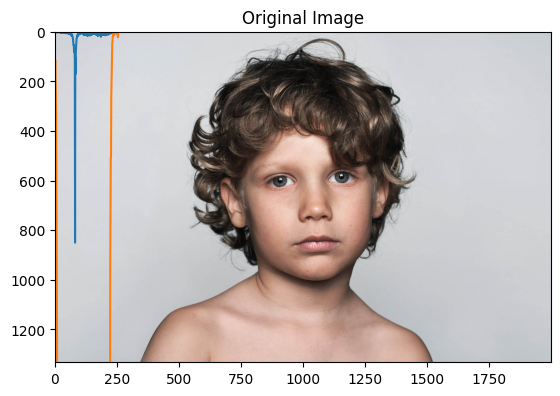

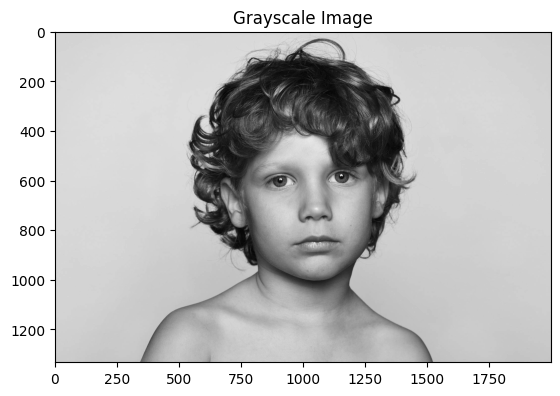

1


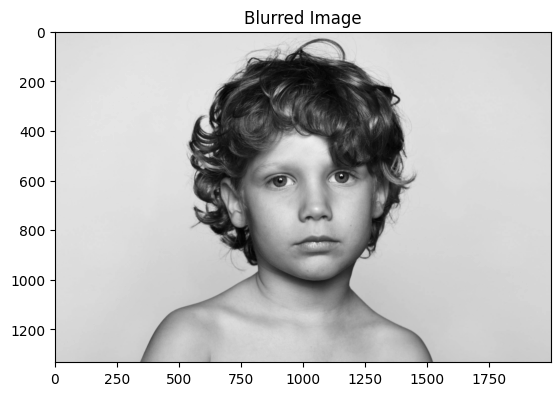

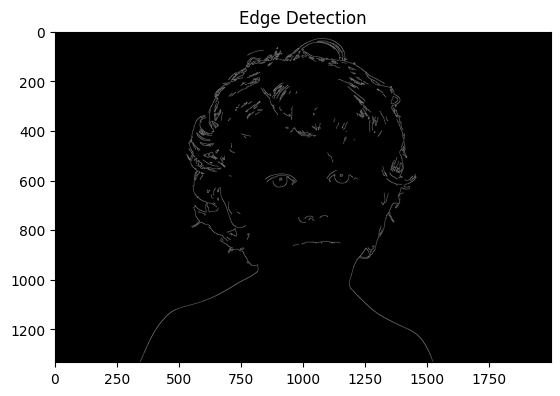

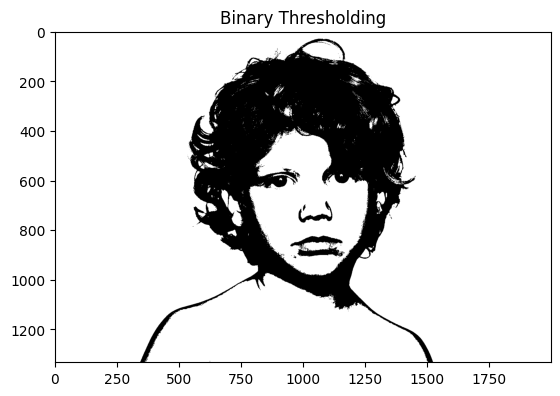

2


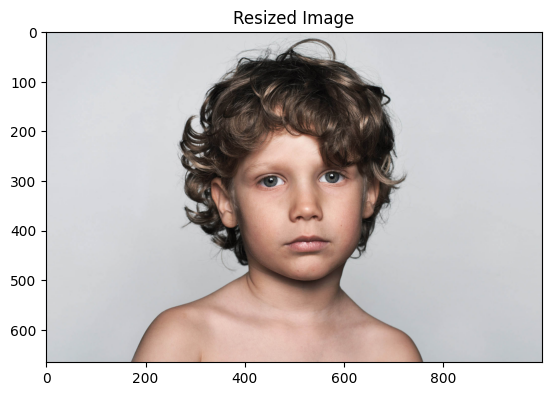

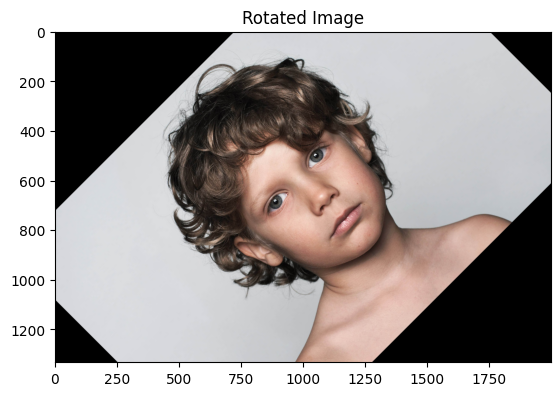

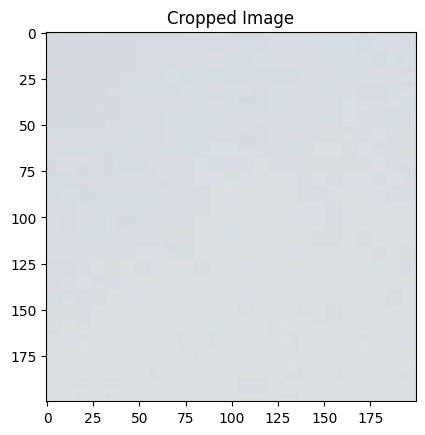

3


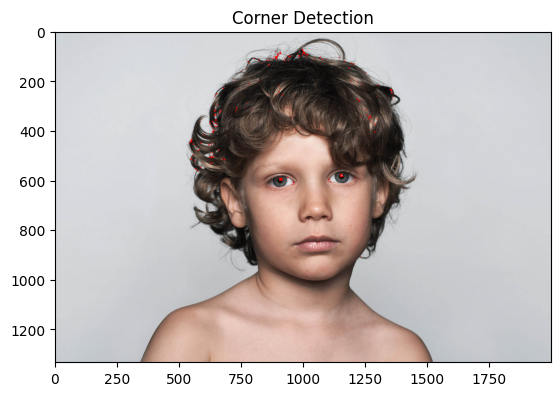

4


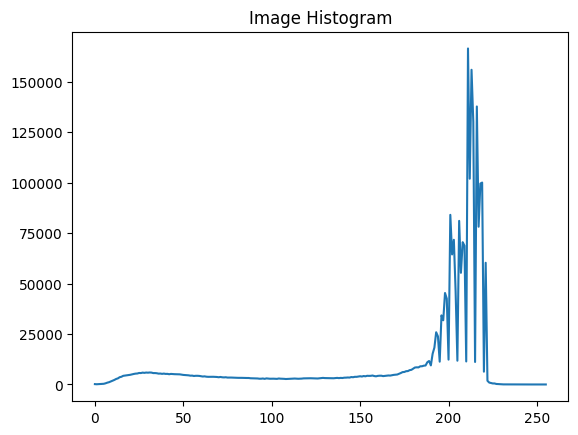

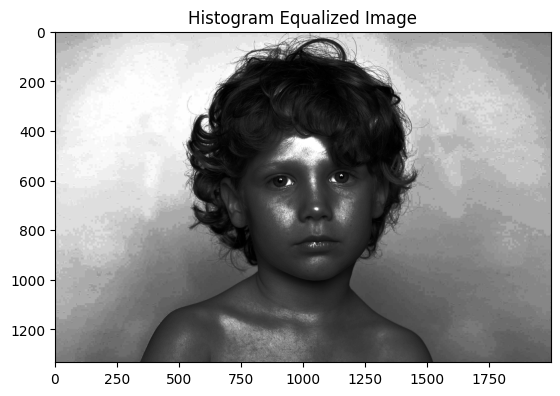

5


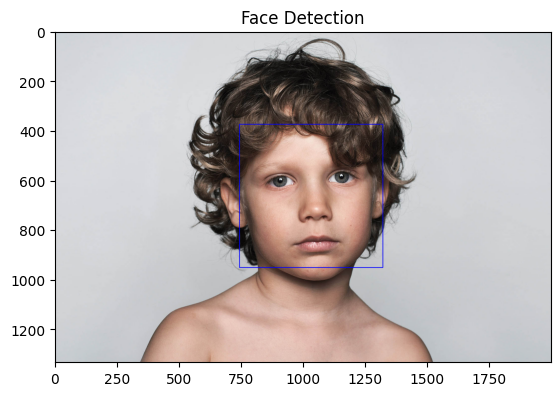

Done


In [54]:
image_path = '/home/omran-xy/Downloads/human-face-4.jpg'  # Path to the uploaded image

# Main execution
if __name__ == "__main__":
    print('Loading and displaying image...')
    img, gray = load_and_display_image(image_path)
    print('1')
    process_image(gray)
    print('2')
    manipulate_image(img)
    print('3')
    detect_corners(img.copy(), gray)
    print('4')
    analyze_histogram(gray)
    print('5')
    detect_faces(img.copy())
    print('Done')


Conclusion
This project demonstrates fundamental image processing techniques with OpenCV, such as loading, displaying, manipulating, and analyzing images. The bonus task on face detection provides a real-world application of OpenCV’s capabilities in detecting objects in an image.